In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import DataReader
import matplotlib.pyplot as plt
from datetime import datetime
 
def find_max_drawdown(prices):
    """
    Takes Series with closing prices.
    Returns the value of maximum drawdown
    in percent and indexes of prices where this
    maximum drawdown took place. If stock is
    always growing it will return minimum
    growth with and indexes of prices where this
    minimum growth took place.
    """
    max_price = prices.iloc[0]
    curr_drawdown = 0
    max_drawdown = 0
    curr_left = 0
    left = 0
    right = 0
    for i in range(0, len(prices)):
        curr_drawdown = (prices.iloc[i] / max_price - 1) * 100
        if curr_drawdown < max_drawdown:
            max_drawdown = curr_drawdown
            left = curr_left
            right = i
        if prices.iloc[i] > max_price:
            max_price = prices.iloc[i]
            curr_left = i
    return max_drawdown, left, right
 
def calc_growth(prices):
    """
    Calculates list with growth
    """
    growth = []
    past_p = 0
    for p in prices:
        if past_p:
            growth.append(p - past_p)
        past_p = p
    return growth
 
def find_max_recovery(prices):
    """
    Takes Series with closing prices.
    Returns the value of maximum recovery
    period in days and indexes of prices
    where this recovery period took place.
    """
    growth = calc_growth(prices)
    s = 0
    left = 0
    right = 0
    curr_left = 0
    max_recovery = 0
    for i in range(0, len(growth)):
        if not s:
            curr_left = i
        s += growth[i]
        if s > 0:
          s = 0
          if max_recovery < (i - curr_left):
              max_recovery = i - curr_left
              left = curr_left
              right = i
            
    return max_recovery, left, right + 1
 
def show_stats_of_stock(stock, beg_date, end_date):
    data = DataReader(stock, 'yahoo', beg_date, end_date)["Close"]
 
    # find max drowdawn boundaries in appropriate format
    max_drawdown = find_max_drawdown(data)
    max_drawdown_date = [pd.to_datetime(data.axes[0].tolist()[max_drawdown[1]]), pd.to_datetime(data.axes[0].tolist()[max_drawdown[2]])]
    max_drawdown_val = [data.iloc[max_drawdown[1]], data.iloc[max_drawdown[2]]]
 
    # find max recovery period boundaries in appropriate format
    max_recovery = find_max_recovery(data)
    max_recovery_date = [pd.to_datetime(data.axes[0].tolist()[max_recovery[1]]), pd.to_datetime(data.axes[0].tolist()[max_recovery[2]])]
    max_recovery_val = [data.iloc[max_recovery[1]], data.iloc[max_recovery[2]]]
 
    # plot data
    plt.plot(data, label = stock, color = 'blue')
 
    # plot max drawdown
    max_drawdown_section = np.arange(max_drawdown[1], max_drawdown[2], 1)
    date_max_drawdown_section = pd.to_datetime(np.array(data.axes[0].tolist())[max_drawdown_section])
    #plt.fill_between(date_max_drawdown_section, data[date_max_drawdown_section], color = 'red', label = "max drawdown")
    #print(data.iloc[max_drawdown[1]])
    plt.hlines(data.iloc[max_drawdown[1]], data.index[0], data.index[max_drawdown[1]], label = "max drawdown", colors='#808080', linestyles= '--', linewidth = 2)
    plt.hlines(data.iloc[max_drawdown[2]], data.index[0], data.index[max_drawdown[2]],  colors='#808080', linestyles= '--', linewidth = 2)

    plt.ylabel("max drawdown {}%".format(round(-max_drawdown[0], 1)), fontweight='bold')
 
    # plot max recovery period
    max_recovery_section = np.arange(max_recovery[1], max_recovery[2], 1)
    date_max_recovery_section = pd.to_datetime(np.array(data.axes[0].tolist())[max_recovery_section])
    max_price = max(data)
    #plt.fill_between(date_max_recovery_section, data[date_max_recovery_section], max_price + 1, color = 'magenta', label = "max recover period")
    plt.fill_between(date_max_recovery_section, data[date_max_recovery_section], color = '#ffcccc', label = "max recover period")

    plt.xlabel("max drawdown {} days".format(round(max_recovery[0], 0)), fontweight='bold')

    plt.grid(color='#cccccc', linewidth = 0.5)
    plt.legend()
    plt.show()

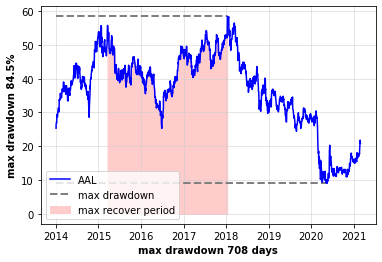

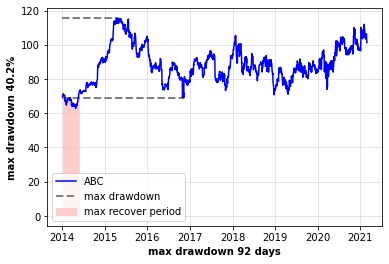

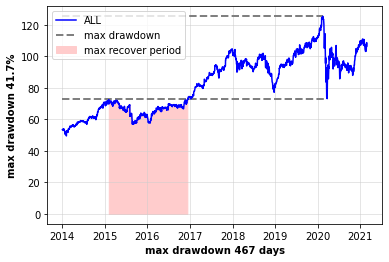

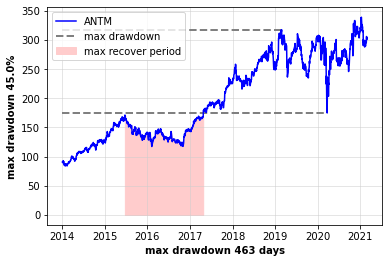

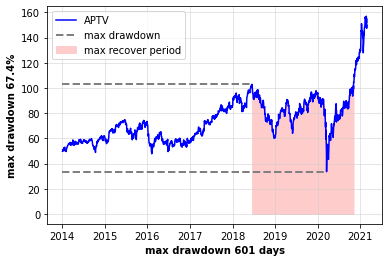

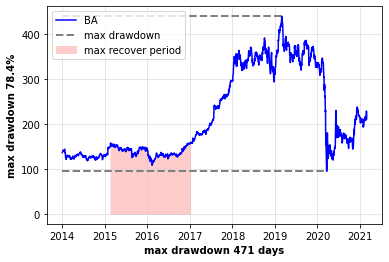

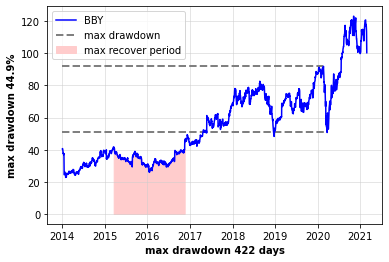

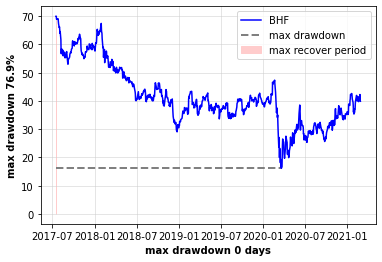

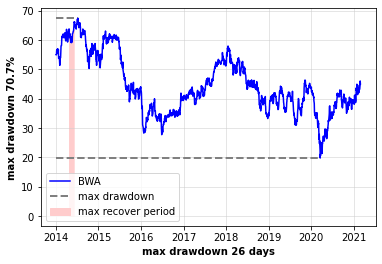

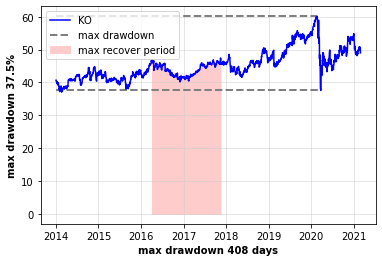

In [ ]:
assets=['AAL', 'ABC', 'ALL', 'ANTM', 'APTV', 'BA', 'BBY', 'BHF', 'BWA', 'KO']

for a in assets:
    show_stats_of_stock(a, datetime(2014,1,1), datetime(2021,2,27))